#### 1. Librerías

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Import onehotencoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Tree Visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
#!pip install pydot
import pydot

# Save model / deployment
import pickle
import sys

# Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

#### 2. Datos

In [2]:
# Carga de datos
df = pd.read_csv('../../Data/processed/delitos_mvd_final_sin_vd.csv')

In [3]:
# Visualización de los primeros registros
df.head().T

,0,1,2,3,4
BARRIO_MONTEVIDEO,AGUADA,AGUADA,AGUADA,AGUADA,AGUADA
FECHA,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
AÑO,2013,2013,2013,2013,2013
MES,1,1,1,1,1
DIA_MES,2,3,4,5,6
DIA_SEMANA,MIERCOLES,JUEVES,VIERNES,SABADO,DOMINGO
SEMANA_MES,1,1,1,1,1
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
COUNT_DELITOS,1,1,6,1,4


In [4]:
# Transformación de la variable objetivo
df['RIESGO'] = df['RIESGO'].apply(lambda x: 1 if x == 'Alto' else 0)

In [5]:
#CHequeo de transformación
df['RIESGO'].value_counts()

RIESGO
0    181017
1     60626
Name: count, dtype: int64

In [6]:
# Nombre de las variables
df.columns

Index(['BARRIO_MONTEVIDEO', 'FECHA', 'AÑO', 'MES', 'DIA_MES', 'DIA_SEMANA',
       'SEMANA_MES', 'SEMESTRE', 'TRIMESTRE', 'COUNT_DELITOS', 'POBLACION',
       'TURISTICO', 'MUNICIPIO', 'PLAYA', 'INSE', 'TEMPMAX', 'TEMPMIN', 'TEMP',
       'FEELSLIKEMAX', 'FEELSLIKEMIN', 'FEELSLIKE', 'HUMIDITY', 'PRECIP',
       'WINDGUST', 'WINDSPEED', 'SEALEVELPRESSURE', 'VISIBILITY', 'SEVERERISK',
       'CONDITIONCLEAR', 'CONDITIONPARTIALLYCLOUDY', 'CONDITIONOVERCAST',
       'CONDITIONRAIN', 'WINDIRCAT', 'SEVERERISKCAT', 'TASA_DESEMPLEO',
       'NO_LABORABLE', 'NOMBRE_FESTIVO', 'COUNT_DELITOS_NORM', 'RIESGO'],
      dtype='object')

In [7]:
# Selección de variables para modelar
df_red = df[['BARRIO_MONTEVIDEO', 'MES', 'DIA_MES', 'DIA_SEMANA','SEMANA_MES', 'SEMESTRE', 'TRIMESTRE',
        'TURISTICO', 'MUNICIPIO', 'PLAYA', 'INSE', 'TEMPMAX', 'HUMIDITY', 'PRECIP','WINDGUST', 'WINDSPEED', 'SEALEVELPRESSURE', 'VISIBILITY','CONDITIONCLEAR', 'CONDITIONPARTIALLYCLOUDY', 'CONDITIONOVERCAST',
        'CONDITIONRAIN', 'WINDIRCAT', 'SEVERERISKCAT', 'TASA_DESEMPLEO','NO_LABORABLE', 'NOMBRE_FESTIVO', 'RIESGO']].copy()

In [8]:
# Datos perdidos
df.isna().sum()

BARRIO_MONTEVIDEO               0
FECHA                           0
AÑO                             0
MES                             0
DIA_MES                         0
DIA_SEMANA                      0
SEMANA_MES                      0
SEMESTRE                        0
TRIMESTRE                       0
COUNT_DELITOS                   0
POBLACION                       0
TURISTICO                       0
MUNICIPIO                       0
PLAYA                           0
INSE                            0
TEMPMAX                         0
TEMPMIN                         0
TEMP                            0
FEELSLIKEMAX                    0
FEELSLIKEMIN                    0
FEELSLIKE                       0
HUMIDITY                        0
PRECIP                          0
WINDGUST                    38059
WINDSPEED                       0
SEALEVELPRESSURE                0
VISIBILITY                      0
SEVERERISK                      0
CONDITIONCLEAR                  0
CONDITIONPARTI

In [9]:
# Asignamos valor de WINDSPEED a datos nulos de WINDGUST
df_red['WINDGUST'] = df_red['WINDGUST'].fillna(df_red['WINDSPEED'])

In [10]:
# Chequeo
df_red.head().T

,0,1,2,3,4
BARRIO_MONTEVIDEO,AGUADA,AGUADA,AGUADA,AGUADA,AGUADA
MES,1,1,1,1,1
DIA_MES,2,3,4,5,6
DIA_SEMANA,MIERCOLES,JUEVES,VIERNES,SABADO,DOMINGO
SEMANA_MES,1,1,1,1,1
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
TURISTICO,0,0,0,0,0
MUNICIPIO,C,C,C,C,C
PLAYA,NO,NO,NO,NO,NO


#### 3. Separación en training y test dataset

In [11]:
# Defincicón de objetivo
X = df_red.drop('RIESGO', axis=1)
y = df_red['RIESGO']

# División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
# Chequeamos la el tamaño de los datos
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(193314, 27)
(48329, 27)
(193314,)
(48329,)


#### 4. Feature encoding y scaling

##### 4.1. Definición de Encoders

- Definicion de variables para encoding

In [28]:
# Definición de variables categóricas para one hot-encoding
one_hot_columns = ['DIA_SEMANA','SEMANA_MES', 'SEMESTRE', 'TRIMESTRE', 'PLAYA', 'WINDIRCAT', 'SEVERERISKCAT', 'NO_LABORABLE']

# Definición de variables numéricas para estandarización
continuous_columns = ['INSE', 'TEMPMAX', 'HUMIDITY', 'PRECIP', 'WINDGUST', 'WINDSPEED', 'SEALEVELPRESSURE', 'VISIBILITY', 'TASA_DESEMPLEO']

# Definición de variables para target encoding
targ_enc_columns = ['BARRIO_MONTEVIDEO', 'DIA_MES', 'MES' , 'MUNICIPIO', 'NOMBRE_FESTIVO']

- One hot Encoding

In [13]:
from category_encoders.one_hot import OneHotEncoder

# Function to apply One-Hot Encoding to the specified categorical columns.
def apply_one_hot_encoding(X_train, X_test, categorical_columns):
    """
    Apply One-Hot Encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - X_test: DataFrame, the testing dataset.
    - categorical_columns: list, list of categorical columns to encode.

    Returns:
    - X_train_encoded: DataFrame, the training dataset with One-Hot Encoded columns.
    - X_test_encoded: DataFrame, the testing dataset with One-Hot Encoded columns.
    - encoder: Fitted OneHotEncoder instance from category_encoders.
    """
    # Initialize the OneHotEncoder from category_encoders
    encoder = OneHotEncoder(cols=categorical_columns, use_cat_names=True)

    # Fit and transform the training set
    X_train_encoded = encoder.fit_transform(X_train)

    # Transform the testing set using the same encoder
    X_test_encoded = encoder.transform(X_test)

    return X_train_encoded, X_test_encoded, encoder

- Standard Scaling Encoding

In [14]:
# Function to apply Standard Scaling to the specified numerical columns.
def apply_scaling(X_train, X_test, scale_columns):
    """
    Apply Standard Scaling to the specified numerical columns.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - X_test: DataFrame, the testing dataset.
    - scale_columns: list, list of numerical columns to scale.

    Returns:
    - X_train_scaled: DataFrame, the training dataset with scaled columns.
    - X_test_scaled: DataFrame, the testing dataset with scaled columns.
    - scaler: Fitted StandardScaler instance.
    """
    # Initialize the Standard Scaler
    scaler = StandardScaler()

    # Fit the scaler on the training set and transform
    X_train_scaled = X_train.copy()
    X_train_scaled[scale_columns] = scaler.fit_transform(X_train[scale_columns])

    # Transform the testing set using the same scaler
    X_test_scaled = X_test.copy()
    X_test_scaled[scale_columns] = scaler.transform(X_test[scale_columns])

    return X_train_scaled, X_test_scaled, scaler

- Target Encoding

In [29]:
# Function to apply Target encoding to the specified categorical columns.
from category_encoders.target_encoder import TargetEncoder

def apply_target_encoding(X_train, y_train, X_test, target_columns):
    """
    Apply Target Encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - y_train: Series, the target variable for the training dataset.
    - X_test: DataFrame, the testing dataset.
    - target_columns: list, list of categorical columns to transform.

    Returns:
    - X_train_transformed: DataFrame, the training dataset with Target-encoded columns.
    - X_test_transformed: DataFrame, the testing dataset with Target-encoded columns.
    - target_encoder: Fitted TargetEncoder instance.
    """
    # Initialize the Target encoder
    target_encoder = TargetEncoder(cols=target_columns)

    # Fit and transform the training set
    X_train_transformed = target_encoder.fit_transform(X_train, y_train)

    # Transform the testing set using the same encoder
    X_test_transformed = target_encoder.transform(X_test)

    return X_train_transformed, X_test_transformed, target_encoder

- Función para aplicar el encoding

In [30]:
# Function to transform Train and Test data using the defined encoders

def encoding_data (X_train, y_train, X_test):
    """
    Transforms Train and Test datasets by applying WOE encoding, Target encoding, 
    Standard scaling, and One-Hot encoding.
    
    Parameters:
    - X_train: DataFrame, training features.
    - y_train: Series/DataFrame, target variable for training.
    - X_test: DataFrame, testing features.
    
    Returns:
    - X_train_enc: Transformed training dataset.
    - X_test_enc: Transformed testing dataset.
    - woe_encoder, target_encoder, scaler, one_hot_encoder: Fitted encoders and scaler.
    """
    
    X_train_enc = X_train.copy()
    X_test_enc = X_test.copy()

    
    
    # Applying Target encoding
    X_train_enc, X_test_enc, target_encoder = apply_target_encoding(X_train_enc, y_train, X_test_enc, targ_enc_columns)
    
    # Applying Standard Scaling
    X_train_enc, X_test_enc, scaler = apply_scaling(X_train_enc, X_test_enc, continuous_columns)
    
    # Applying One-hot encoding
    X_train_enc, X_test_enc, one_hot_encoder = apply_one_hot_encoding(X_train_enc, X_test_enc, one_hot_columns)
    
    return X_train_enc, X_test_enc

##### 4.2. Aplicando Encoding a Training y Test dataset

In [34]:
# Encoding de Train y Test
X_train_enc, X_test_enc, target_encoder, scaler, one_hot_encoder = encoding_data(X_train, y_train, X_test)

In [35]:
# Chequeo de Train transformado
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193314 entries, 3043 to 43074
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BARRIO_MONTEVIDEO          193314 non-null  float64
 1   MES                        193314 non-null  float64
 2   DIA_MES                    193314 non-null  float64
 3   DIA_SEMANA_VIERNES         193314 non-null  int64  
 4   DIA_SEMANA_MARTES          193314 non-null  int64  
 5   DIA_SEMANA_SABADO          193314 non-null  int64  
 6   DIA_SEMANA_MIERCOLES       193314 non-null  int64  
 7   DIA_SEMANA_JUEVES          193314 non-null  int64  
 8   DIA_SEMANA_LUNES           193314 non-null  int64  
 9   DIA_SEMANA_DOMINGO         193314 non-null  int64  
 10  SEMANA_MES_1.0             193314 non-null  int64  
 11  SEMANA_MES_2.0             193314 non-null  int64  
 12  SEMANA_MES_4.0             193314 non-null  int64  
 13  SEMANA_MES_5.0             19331

In [37]:
X_train_enc.head().T

,3043,207896,202209,64752,18064
BARRIO_MONTEVIDEO,0.295510,0.196349,0.256372,0.283019,0.357121
MES,0.253142,0.242432,0.242432,0.240653,0.277214
DIA_MES,0.252090,0.238178,0.257232,0.246560,0.254139
DIA_SEMANA_VIERNES,1.000000,0.000000,0.000000,0.000000,0.000000
DIA_SEMANA_MARTES,0.000000,1.000000,0.000000,1.000000,0.000000
DIA_SEMANA_SABADO,0.000000,0.000000,1.000000,0.000000,0.000000
DIA_SEMANA_MIERCOLES,0.000000,0.000000,0.000000,0.000000,1.000000
DIA_SEMANA_JUEVES,0.000000,0.000000,0.000000,0.000000,0.000000
DIA_SEMANA_LUNES,0.000000,0.000000,0.000000,0.000000,0.000000
DIA_SEMANA_DOMINGO,0.000000,0.000000,0.000000,0.000000,0.000000


#### 5. Función para cálculo de métricas

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

def compute_metrics(model, X_train, y_train, X_test, y_test, trh=0.5):
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    y_pred_train = (y_pred_proba_train >= trh).astype(bool)
    y_pred_test = (y_pred_proba_test >= trh).astype(bool)

    # Calcular curva ROC
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_pred_proba_train)
    fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_pred_proba_test)

    # Matriz de confusión para Train
    tn_train, fp_train, fn_train, tp_train = metrics.confusion_matrix(y_train, y_pred_train).ravel()
    specificity_train = tn_train / (tn_train + fp_train)

    # Matriz de confusión para Test
    tn_test, fp_test, fn_test, tp_test = metrics.confusion_matrix(y_test, y_pred_test).ravel()
    specificity_test = tn_test / (tn_test + fp_test)

    # Imprimir métricas para Train
    print('Train results:')
    print(f"{model.__class__.__name__} Accuracy (Train): {metrics.accuracy_score(y_train, y_pred_train):.3f}")
    print(f"{model.__class__.__name__} AUC (Train): {metrics.auc(fpr_train, tpr_train):.3f}")
    print(f"{model.__class__.__name__} Recall (Train): {metrics.recall_score(y_train, y_pred_train):.3f}")
    print(f"{model.__class__.__name__} Specificity (Train): {specificity_train:.3f}")
    print(f"{model.__class__.__name__} F1-score (Train): {metrics.f1_score(y_train, y_pred_train):.3f}")


    # Imprimir métricas para Test
    print('Test results:')
    print(f"{model.__class__.__name__} Accuracy (Test): {metrics.accuracy_score(y_test, y_pred_test):.3f}")
    print(f"{model.__class__.__name__} AUC (Test): {metrics.auc(fpr_test, tpr_test):.3f}")
    print(f"{model.__class__.__name__} Recall (Test): {metrics.recall_score(y_test, y_pred_test):.3f}")
    print(f"{model.__class__.__name__} Specificity (Test): {specificity_test:.3f}")
    print(f"{model.__class__.__name__} F1-score (Test): {metrics.f1_score(y_test, y_pred_test):.3f}")

    
        # Crear curva ROC
    plt.figure(figsize=(4, 4))
    plt.plot(fpr_train, tpr_train, '-r')
    plt.plot(fpr_test, tpr_test, '-b')
    plt.plot([0, 1], ls="--")
    plt.legend(['Train', 'Test'])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # Mostrar matrices de confusión como gráficos de calor
    fig, axes = plt.subplots(1, 2, figsize=(12, 1))
    
    # Matriz de confusión para Train
    sns.heatmap(metrics.confusion_matrix(y_train, y_pred_train), annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title("Confusion Matrix (Train)")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    # Matriz de confusión para Test
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="Reds", ax=axes[1])
    axes[1].set_title("Confusion Matrix (Test)")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    
    plt.show()


#### 6. Modelado

Train results:
DecisionTreeClassifier Accuracy (Train): 1.000
DecisionTreeClassifier AUC (Train): 1.000
DecisionTreeClassifier Recall (Train): 1.000
DecisionTreeClassifier Specificity (Train): 1.000
DecisionTreeClassifier F1-score (Train): 1.000
Test results:
DecisionTreeClassifier Accuracy (Test): 0.684
DecisionTreeClassifier AUC (Test): 0.581
DecisionTreeClassifier Recall (Test): 0.374
DecisionTreeClassifier Specificity (Test): 0.788
DecisionTreeClassifier F1-score (Test): 0.372


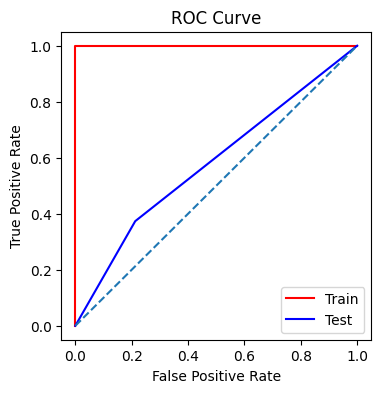

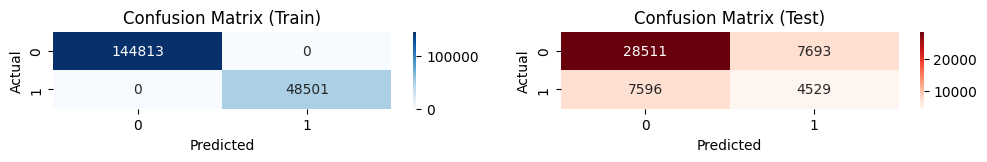

In [39]:
# Define the model decision tree
model_dt_1 = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the model
model_dt_1.fit(X_train_enc, y_train)

# Compute metrics
compute_metrics(model_dt_1, X_train_enc, y_train, X_test_enc, y_test)

In [40]:
# Obtener la importancia de las variables
importancias = model_dt_1.feature_importances_
variables = X_train_enc.columns

# Ordenar de mayor a menor
df_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Mostrar las 20 variables más importantes
print(df_importancia.head(30))

top_n = 50  # Número de variables a conservar
top_variables = df_importancia.iloc[:top_n]['Variable'].values

# Redefinir dataset con menos variables
X_train_reducido = X_train_enc[top_variables]
X_test_reducido = X_test_enc[top_variables]

                    Variable  Importancia
0          BARRIO_MONTEVIDEO     0.247496
25                      INSE     0.070088
22                 MUNICIPIO     0.062533
26                   TEMPMAX     0.058900
27                  HUMIDITY     0.058355
31          SEALEVELPRESSURE     0.057337
32                VISIBILITY     0.052431
30                 WINDSPEED     0.052311
29                  WINDGUST     0.050841
43            TASA_DESEMPLEO     0.048319
2                    DIA_MES     0.044418
1                        MES     0.021955
28                    PRECIP     0.021153
21                 TURISTICO     0.008944
14            SEMANA_MES_3.0     0.006781
39            WINDIRCAT_Este     0.006630
11            SEMANA_MES_2.0     0.006589
38           WINDIRCAT_Norte     0.006564
6       DIA_SEMANA_MIERCOLES     0.006530
12            SEMANA_MES_4.0     0.006489
3         DIA_SEMANA_VIERNES     0.006341
4          DIA_SEMANA_MARTES     0.005995
8           DIA_SEMANA_LUNES     0

##### 6.1. Regresión Logística

In [ ]:
model_rl_1 =  LogisticRegression(solver = 'liblinear', random_state= 1234, class_weight='balanced' ) # class_weight='balanced' para balancear las clases
model_rl_1.fit(X_train_enc, y_train)

LogisticRegression(class_weight='balanced', random_state=1234,
                   solver='liblinear')

Train results:
LogisticRegression Accuracy (Train): 0.692
LogisticRegression AUC (Train): 0.730
LogisticRegression Recall (Train): 0.600
LogisticRegression Specificity (Train): 0.723
LogisticRegression F1-score (Train): 0.494
Test results:
LogisticRegression Accuracy (Test): 0.694
LogisticRegression AUC (Test): 0.737
LogisticRegression Recall (Test): 0.610
LogisticRegression Specificity (Test): 0.722
LogisticRegression F1-score (Test): 0.500


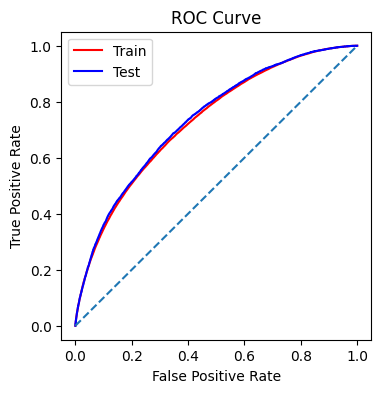

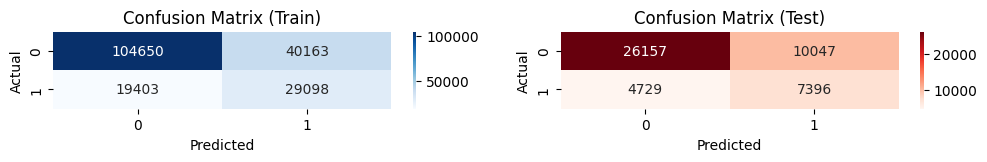

In [43]:
# Compute metrics
compute_metrics(model_rl_1, X_train_enc, y_train, X_test_enc, y_test)

- No es un buen modelo, F1 es muy bajo

In [44]:
# LR Hyperparameter tuning 1 - GridSearchCV

# Define hyperparameters
param_grid = {
    'C': [0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'random_state': 1234, 
    'class_weight':'balanced'
}

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model
# ...existing code...
import numpy as np


# Ahora intenta ajustar el modelo de nuevo
grid_search.fit(X_train_reducido, y_train)
# ...existing code...

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best F1 on validation:", grid_search.best_score_)

# Save the best parameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 on validation: 0.3507758028224912


Train results:
LogisticRegression Accuracy (Train): 0.692
LogisticRegression AUC (Train): 0.730
LogisticRegression Recall (Train): 0.599
LogisticRegression Specificity (Train): 0.723
LogisticRegression F1-score (Train): 0.494
Test results:
LogisticRegression Accuracy (Test): 0.695
LogisticRegression AUC (Test): 0.737
LogisticRegression Recall (Test): 0.608
LogisticRegression Specificity (Test): 0.724
LogisticRegression F1-score (Test): 0.500


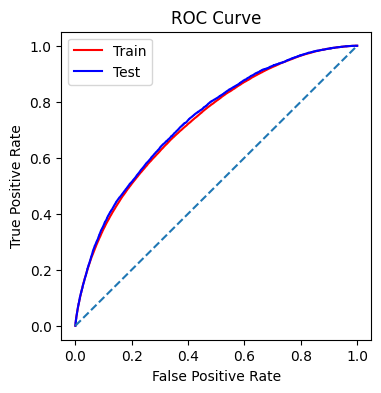

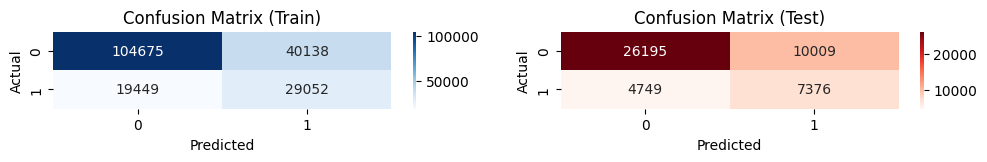

In [45]:
# Initialize the best model with the best hyperparameters
best_rl_model_1 = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', **best_params)

# Train the model
best_rl_model_1.fit(X_train_enc, y_train)

# Compute metrics of the best model
compute_metrics(best_rl_model_1, X_train_enc, y_train, X_test_enc, y_test)

In [46]:
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import numpy as np

# X: Preprocessed predictor variables
# y: Binary target variable (0 and 1)
# Ensure X and y are ready and preprocessed

# Define the objective function
def logistic_cv(C, penalty_idx, solver_idx):
    """
    Objective function to maximize AUC-ROC using cross-validation.
    """
    # Map categorical values for 'penalty' and 'solver'
    penalty = ['l2', 'none'][int(penalty_idx)]
    solver = ['liblinear', 'newton-cg', 'newton-cholesky', 'saga', 'lbfgs'][int(solver_idx)]
    
    # Create the model
    model = LogisticRegression(
        C=C,                             # Inverse of regularization strength
        penalty=penalty,                 # Type of regularization
        solver=solver,                   # Algorithm for optimization
        max_iter=100,                    # Increase iterations
        random_state=1234,               # Reproducibility
        n_jobs=-1                        # Parallel processing
    )
    
    # Cross-validation with AUC-ROC
    scores = cross_val_score(model, X_train_enc, y_train, cv=3, scoring='f1', n_jobs=-1)
    return scores.mean()  # Return the average AUC-ROC

# Define the search space for hyperparameters
pbounds = {
    'C': (0.01, 20),                  # Regularization: lower C = stronger regularization
    'penalty_idx': (0, 1),            # Indices for 'penalty' (0 = l1, 1 = l2, 2 = elasticnet)
    'solver_idx': (0, 4)              # Indices for 'solver' (0 = liblinear, 1 = newton-cg, ...)
}

# Create the Bayesian optimizer
optimizer = BayesianOptimization(
    f=logistic_cv,                    # Objective function (AUC-ROC)
    pbounds=pbounds,                  # Search space
    random_state=42,                  # Reproducibility
    verbose=2                         # Verbosity level
)

# Optimize
optimizer.maximize(
    init_points=5,                    # Number of initial iterations (random points)
    n_iter=25                         # Number of optimization iterations
)

# Best result
print("Best parameters found:")
print(optimizer.max)

# Save the best parameters
best_params = optimizer.max['params']


|   iter    |  target   |     C     | penalt... | solver... |
-------------------------------------------------------------


c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\bayes_opt\target_space.py:344: UserWarning: You're attempting to register an np.ndarray. Currently, the optimizer internally sorts parameters by key and expects any registered array to respect this order. In future versions this behaviour will change and the order as given by the pbounds dictionary will be used. If you wish to retain sorted parameters, please manually sort your pbounds dictionary before constructing the optimizer.
  warn(msg, stacklevel=1)


| 1         | 0.3514    | 7.497     | 0.9507    | 2.928     |
| 2         | 0.3514    | 11.98     | 0.156     | 0.624     |
| 3         | 0.3509    | 1.171     | 0.8662    | 2.404     |
| 4         | 0.3515    | 14.16     | 0.02058   | 3.88      |
| 5         | 0.3515    | 16.65     | 0.2123    | 0.7273    |
| 6         | 0.3515    | 19.99     | 0.7779    | 3.9       |
| 7         | 0.3515    | 19.91     | 0.1761    | 0.08261   |
| 8         | 0.3515    | 16.97     | 0.9966    | 3.748     |
| 9         | 0.3515    | 10.73     | 0.6361    | 3.993     |
| 10        | 0.3515    | 15.33     | 0.9659    | 0.1317    |
| 11        | 0.3515    | 18.01     | 0.9878    | 1.017     |
| 12        | 0.3515    | 9.308     | 0.05233   | 3.928     |
| 13        | 0.3515    | 18.46     | 0.07287   | 3.969     |
| 14        | 0.3515    | 17.18     | 1.461e-05 | 0.05692   |
| 15        | 0.3514    | 15.4      | 0.9181    | 2.028     |
| 16        | 0.3514    | 8.556     | 0.08172   | 0.02059   |
| 17    

c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Train results:
LogisticRegression Accuracy (Train): 0.767
LogisticRegression AUC (Train): 0.730
LogisticRegression Recall (Train): 0.252
LogisticRegression Specificity (Train): 0.940
LogisticRegression F1-score (Train): 0.352
Test results:
LogisticRegression Accuracy (Test): 0.770
LogisticRegression AUC (Test): 0.736
LogisticRegression Recall (Test): 0.257
LogisticRegression Specificity (Test): 0.941
LogisticRegression F1-score (Test): 0.359


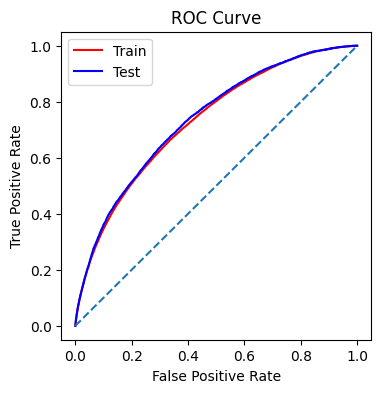

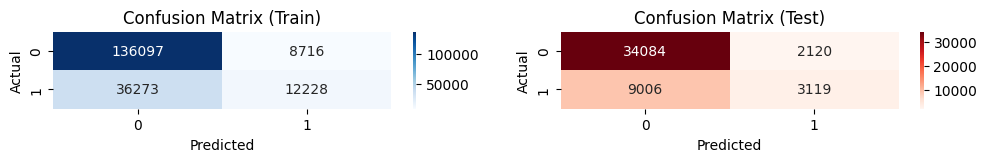

In [48]:
# Initialize the model with the best hyperparameters
best_rl_model_bayesian = LogisticRegression(
    C=best_params['C'],                # Inverse of regularization strength
    penalty=['l2', 'none'][int(best_params['penalty_idx'])],  # Type of regularization
    solver=['liblinear', 'newton-cg', 'newton-cholesky', 'saga', 'lbfgs'][int(best_params['solver_idx'])],  # Optimization algorithm
    max_iter=100,                      # Increase number of iterations
    random_state=1234,                 # Reproducibility
    n_jobs=-1                          # Parallel processing
)

# Train the model
best_rl_model_bayesian.fit(X_train_enc, y_train)

# Compute metrics for the best model
compute_metrics(best_rl_model_bayesian, X_train_enc, y_train, X_test_enc, y_test)